In [1]:
import sys

In [3]:
import pandas as pd 
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np 
from statistics import mean
from sklearn.preprocessing import MinMaxScaler 
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
import seaborn as sns
import networkx as nx
import community.community_louvain as community_louvain

ModuleNotFoundError: No module named 'sklearn'

In [2]:
df = pd.DataFrame()
f = yf.download(tickers = "RELIANCE.NS",
                       start = '2022-01-01',
                       end = '2022-06-01',)

#df = f[[("Adj Close", s) for s in list_of_stocks]]
df = f[["Adj Close"]]
#df.columns = df.columns.droplevel(level=0)
df

[*********************100%***********************]  1 of 1 completed


,Adj Close
Date,
2022-01-03,2396.634521
2022-01-04,2450.721680
2022-01-05,2462.187012
2022-01-06,2409.246338
2022-01-07,2428.687988
...,...
2022-05-25,2604.159668
2022-05-26,2579.334473
2022-05-27,2567.370361


In [3]:
#convert to numpy array for neurl network to take input 

#print(type(df))
training_set = f.iloc[:,4:5].values
#print(type(df))

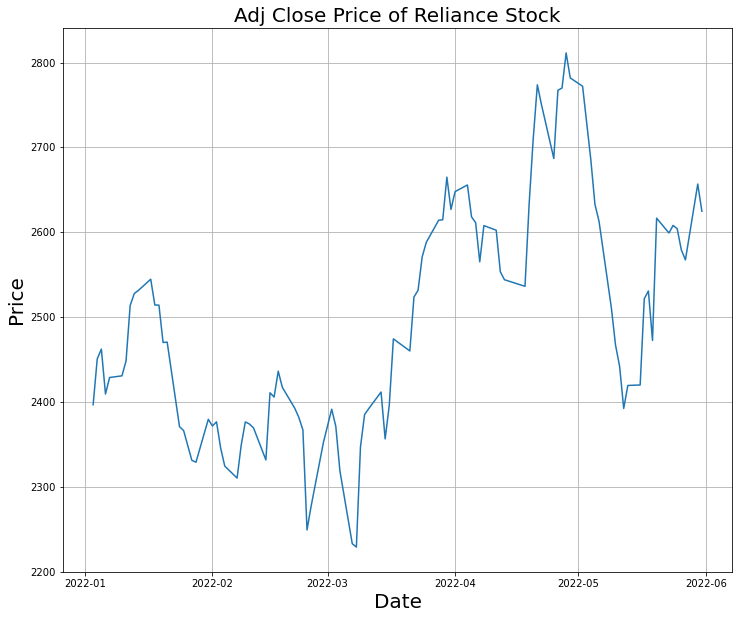

In [4]:
plt.figure(figsize=(12,10))
plt.plot(df)
plt.xlabel("Date", fontsize = 20)
plt.ylabel("Price", fontsize = 20)
plt.title("Adj Close Price of Reliance Stock", fontsize = 20)
plt.grid(True)
plt.show()

In [5]:
scaler = MinMaxScaler(feature_range = (0,1))
scaler
training_set_scaled = scaler.fit_transform(training_set)

In [6]:
#Lag = 15 -( 3 weeks )
#Train the model on 15 day data
x_train_a = []
y_train_a = []
for i in range(15, len(training_set_scaled)):
    x_train_a.append(training_set_scaled[i-15: i, 0])
    y_train_a.append(training_set_scaled[i])

x_train_a, y_train_a = np.array(x_train_a), np.array(y_train_a)

In [7]:
N = len(y_train_a)

In [8]:
N #Total number of inputs

86

In [9]:
x_train_a.shape

(86, 15)

In [49]:
 ## make model 
# instntiate model
my_model = Sequential()

# add layers 

#layer 1
my_model.add(SimpleRNN(units = 50, return_sequences = True, activation = "relu", input_shape = (x_train_a.shape[1] ,1)))
my_model.add(Dropout(rate = 0.2))

#layer 2
my_model.add(SimpleRNN(units = 50, return_sequences = True, activation = "relu"))
my_model.add(Dropout(rate = 0.2))


#layer 3
my_model.add(SimpleRNN(units = 50, return_sequences = True, activation = "relu"))
my_model.add(Dropout(rate = 0.2))

#layer 4
my_model.add(SimpleRNN(units = 50, return_sequences = True, activation = "relu"))
my_model.add(Dropout(rate = 0.2))

#layer 5
my_model.add(SimpleRNN(units = 50, return_sequences = True, activation = "relu"))
my_model.add(Dropout(rate = 0.2))

#layer 6
my_model.add(SimpleRNN(units = 50, return_sequences = True, activation = "relu"))
my_model.add(Dropout(rate = 0.2))

#layer 7
my_model.add(SimpleRNN(units = 50, return_sequences = True, activation = "relu"))
my_model.add(Dropout(rate = 0.2))

#layer 8
my_model.add(SimpleRNN(units = 50, return_sequences = True, activation = "relu"))
my_model.add(Dropout(rate = 0.2))

#layer 9
my_model.add(SimpleRNN(units = 50, return_sequences = True, activation = "relu"))
my_model.add(Dropout(rate = 0.2))

#layer 10
my_model.add(SimpleRNN(units = 50, return_sequences = False, activation = "relu"))
my_model.add(Dropout(rate = 0.2))

#output layer 
my_model.add(Dense(units = 1))

## compile model 
my_model.compile(optimizer = "adam", loss = "mean_squared_error")
    

In [50]:
my_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_9 (SimpleRNN)    (None, 15, 50)            2600      
                                                                 
 dropout_8 (Dropout)         (None, 15, 50)            0         
                                                                 
 simple_rnn_10 (SimpleRNN)   (None, 15, 50)            5050      
                                                                 
 dropout_9 (Dropout)         (None, 15, 50)            0         
                                                                 
 simple_rnn_11 (SimpleRNN)   (None, 15, 50)            5050      
                                                                 
 dropout_10 (Dropout)        (None, 15, 50)            0         
                                                                 
 simple_rnn_12 (SimpleRNN)   (None, 15, 50)           

## Fit Model

In [51]:
# METHOD 1: ONLY SAVES 1 LAYER, ALL WEIGHTS 
# use callback function to get weights after every epoch 
from keras.callbacks import Callback

class CollectWeightCallback(Callback):
    def __init__(self, layer_index):
        super(CollectWeightCallback, self).__init__()
        self.layer_index = layer_index
        self.weights = []

    def on_epoch_end(self, epoch, logs=None):
        layer = self.model.layers[self.layer_index]
        self.weights.append(layer.get_weights()[0]) # [0] - get weight only, no biases

In [13]:
numEpochs = 100
numBatch = 20

In [53]:
cbk0 = CollectWeightCallback(layer_index=0) # 0 = 1st layer 
cbk2 = CollectWeightCallback(layer_index=2) # 2 = 2nd layer or 1st dense layer 
cbk4 = CollectWeightCallback(layer_index=4) # 4 = 3rd layer or 2nd dense layer 
cbk6 = CollectWeightCallback(layer_index=6) # 6 = 4th layer or 3rd dense layer 
cbk8 = CollectWeightCallback(layer_index=6) # 6 = 5th layer or 4th dense layer 
cbk10 = CollectWeightCallback(layer_index=6) # 6 = 6th layer or 5th dense layer 
cbk12 = CollectWeightCallback(layer_index=6) # 6 = 7th layer or 6th dense layer 
cbk14 = CollectWeightCallback(layer_index=6) # 6 = 8th layer or 7th dense layer 
cbk16 = CollectWeightCallback(layer_index=6) # 6 = 9th layer or 8th dense layer 
cbk18 = CollectWeightCallback(layer_index=6) # 6 = 10th layer or 9th dense layer 
#cbk20 = CollectWeightCallback(layer_index=8) # 8 = last layer 
my_model.fit(x_train_a, y_train_a, epochs = numEpochs, callbacks=[cbk0, cbk2, cbk4, cbk6, cbk8, cbk10, cbk12, cbk14, cbk16, cbk18], batch_size = numBatch)

Epoch 1/100
5/5 [==============================] - 0s 30ms/step - loss: 0.0215
Epoch 2/100
5/5 [==============================] - 0s 26ms/step - loss: 0.0199
Epoch 3/100
5/5 [==============================] - 0s 26ms/step - loss: 0.0175
Epoch 4/100
5/5 [==============================] - 0s 26ms/step - loss: 0.0179
Epoch 5/100
5/5 [==============================] - 0s 26ms/step - loss: 0.0210
Epoch 6/100
5/5 [==============================] - 0s 24ms/step - loss: 0.0167
Epoch 7/100
5/5 [==============================] - 0s 24ms/step - loss: 0.0145
Epoch 8/100
5/5 [==============================] - 0s 26ms/step - loss: 0.0198
Epoch 9/100
5/5 [==============================] - 0s 26ms/step - loss: 0.0190
Epoch 10/100
5/5 [==============================] - 0s 32ms/step - loss: 0.0163
Epoch 11/100
5/5 [==============================] - 0s 28ms/step - loss: 0.0170
Epoch 12/100
5/5 [==============================] - 0s 28ms/step - loss: 0.0197
Epoch 13/100
5/5 [==============================]

## Get Weights 

Make Indices

In [55]:
m = 50 # no. of neurons in a hidden layer 
p = 50
index_neuron = [] 
weights_neuron = []
for i in range(50):
    index_neuron.append("Neuron " + str(i+1))
    weights_neuron.append("W" + str(i+1))

In [56]:
n = 0 # weights for n+1th epoch
# hidden layer 1
df01 = pd.DataFrame(cbk2.weights[n], index = index_neuron , columns = weights_neuron)
df01 = df01.transpose()
# hidden layer 2
df02 = pd.DataFrame(cbk4.weights[n], index = index_neuron , columns = weights_neuron)
df02 = df02.transpose()
# hidden layer 3
df03 = pd.DataFrame(cbk6.weights[n], index = index_neuron , columns = weights_neuron)
df03 = df03.transpose()
# hidden layer 4
df04 = pd.DataFrame(cbk8.weights[n], index = index_neuron , columns = weights_neuron)
df04 = df04.transpose()
# hidden layer 5
df05 = pd.DataFrame(cbk10.weights[n], index = index_neuron , columns = weights_neuron)
df05 = df05.transpose()
# hidden layer 6
df06 = pd.DataFrame(cbk12.weights[n], index = index_neuron , columns = weights_neuron)
df06 = df06.transpose()
# hidden layer 7
df07 = pd.DataFrame(cbk14.weights[n], index = index_neuron , columns = weights_neuron)
df07 = df07.transpose()
# hidden layer 8
df08 = pd.DataFrame(cbk16.weights[n], index = index_neuron , columns = weights_neuron)
df08 = df08.transpose()
# hidden layer 9
df09 = pd.DataFrame(cbk18.weights[n], index = index_neuron , columns = weights_neuron)
df09 = df09.transpose()

#### Checking correlation among different layers 

In [57]:
new_df01 = [df01, df02, df03, df04, df05, df06, df07, df08, df09]
df_layer = pd.concat(new_df01, axis = 1, keys = ["L1", "L2", "L3", "L4", "L5", "L6", "L7", "L8", "L9"])

In [111]:
df_layer.corr()

L1                                                    \
              Neuron 1  Neuron 2  Neuron 3  Neuron 4  Neuron 5  Neuron 6   
L1 Neuron 1   1.000000  0.098736 -0.097515 -0.226269  0.110238 -0.017878   
   Neuron 2   0.098736  1.000000  0.000445 -0.022078  0.021162 -0.096390   
   Neuron 3  -0.097515  0.000445  1.000000 -0.063917  0.010747 -0.030281   
   Neuron 4  -0.226269 -0.022078 -0.063917  1.000000  0.055845  0.234974   
   Neuron 5   0.110238  0.021162  0.010747  0.055845  1.000000  0.089677   
...                ...       ...       ...       ...       ...       ...   
L9 Neuron 46  0.027098  0.041147 -0.036957 -0.078158  0.252428  0.149562   
   Neuron 47 -0.000358  0.199076  0.035692  0.060918 -0.007045 -0.248085   
   Neuron 48  0.130958 -0.076289 -0.023827 -0.286310  0.076666 -0.007982   
   Neuron 49  0.142838  0.115816  0.205558 -0.082729  0.212043  0.220592   
   Neuron 50 -0.013494 -0.218456 -0.230433  0.051380 -0.115916 -0.069681   

                                                      ...        L9            \
              Neuron 7  Neuron 8  Neuron 9 Neuron 10  ... Neuron 41 Neuron 42   
L1 Neuron 1   0.148535  0.216669  0.011363  0.020918  ...  0.046007  0.077983   
   Neuron 2   0.087651  0.117075 -0.177477  0.165980  ... -0.134878  0.234971   
   Neuron 3  -0.199637  0.059717 -0.094068  0.163267  ... -0.059135 -0.211878   
   Neuron 4  -0.068258 -0.033142  0.109169  0.051250  ...  0.119395  0.043643   
   Neuron 5   0.073025  0.126146  0.093889  0.078721  ...  0.002803 -0.124625   
...                ...       ...       ...       ...  ...       ...       ...   
L9 Neuron 46  0.012195 -0.030646  0.214089  0.216637  ...  0.038019 -0.208748   
   Neuron 47  0.077856 -0.333373  0.173801  0.173446  ...  0.093117 -0.033442   
   Neuron 48  0.204607  0.086164 -0.166998  0.105864  ... -0.224585 -0.181036   
   Neuron 49 -0.160102  0.234983 -0.013198  0.188791  ... -0.088325 -0.017495   
   Neuron 50  0.066676 -0.092128  0.302586  0.116705  ... -0.057249  0.150338   

                                                                          \
             Neuron 43 Neuron 44 Neuron 45 Neuron 46 Neuron 47 Neuron 48   
L1 Neuron 1  -0.158918 -0.035224  0.147357  0.027098 -0.000358  0.130958   
   Neuron 2  -0.304499 -0.001169  0.045026  0.041147  0.199076 -0.076289   
   Neuron 3   0.104235  0.072240 -0.048338 -0.036957  0.035692 -0.023827   
   Neuron 4   0.146377  0.021442 -0.144978 -0.078158  0.060918 -0.286310   
   Neuron 5   0.022728 -0.173864 -0.194926  0.252428 -0.007045  0.076666   
...                ...       ...       ...       ...       ...       ...   
L9 Neuron 46  0.104398 -0.131041 -0.194839  1.000000  0.186301  0.103562   
   Neuron 47  0.024642 -0.147694 -0.001297  0.186301  1.000000 -0.025939   
   Neuron 48  0.103989 -0.072266  0.066311  0.103562 -0.025939  1.000000   
   Neuron 49 -0.265810 -0.109569 -0.112709 -0.045639 -0.052685  0.091527   
   Neuron 50  0.143383  0.127196 -0.025499 -0.090034  0.184135  0.040714   

                                  
             Neuron 49 Neuron 50  
L1 Neuron 1   0.142838 -0.013494  
   Neuron 2   0.115816 -0.218456  
   Neuron 3   0.205558 -0.230433  
   Neuron 4  -0.082729  0.051380  
   Neuron 5   0.212043 -0.115916  
...                ...       ...  
L9 Neuron 46 -0.045639 -0.090034  
   Neuron 47 -0.052685  0.184135  
   Neuron 48  0.091527  0.040714  
   Neuron 49  1.000000  0.024069  
   Neuron 50  0.024069  1.000000  

[450 rows x 450 columns]

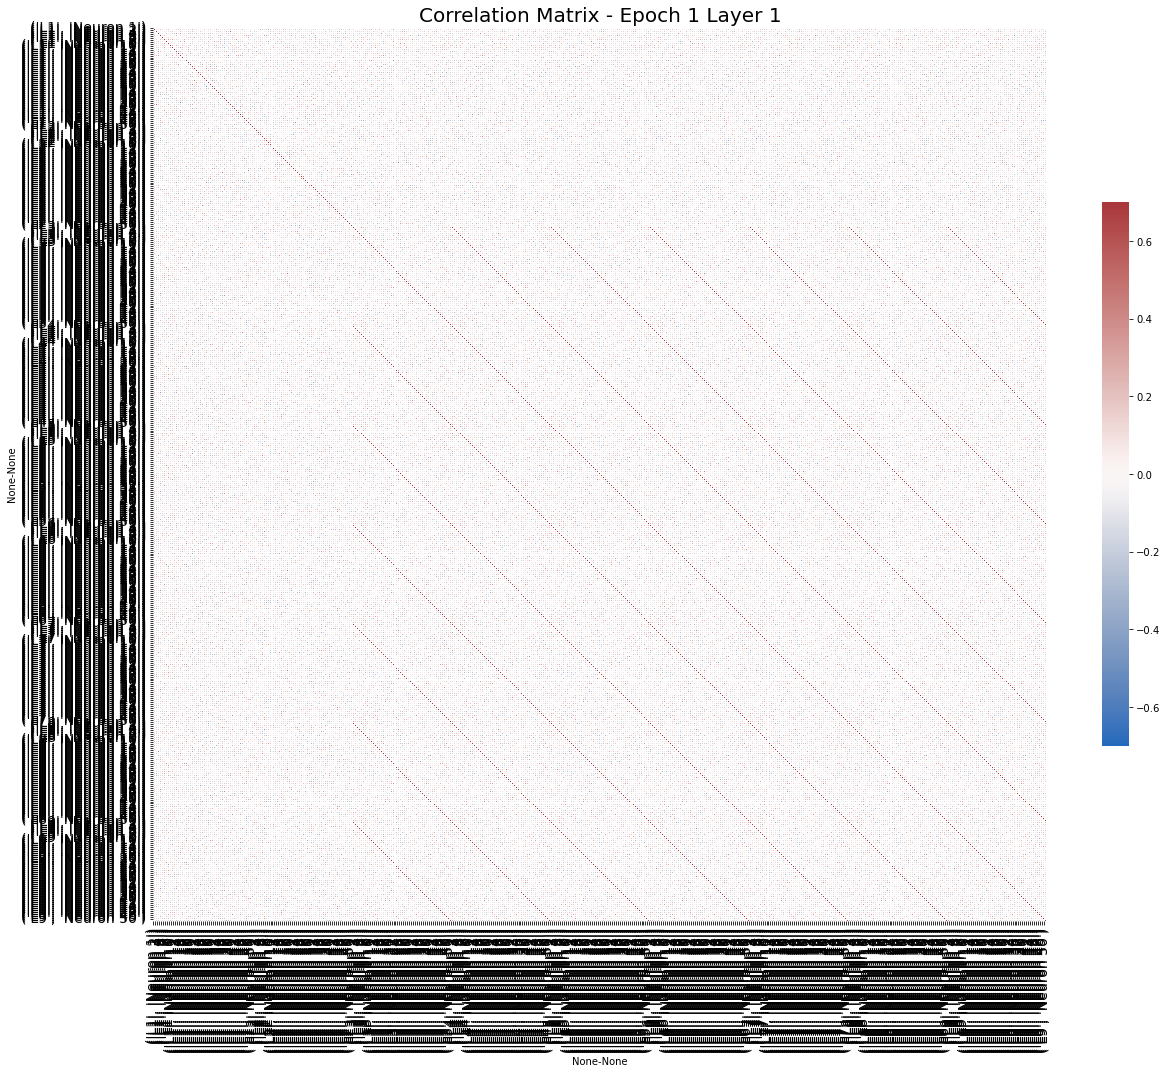

In [112]:
cor_mat01 = df_layer.corr()
f, ax = plt.subplots(figsize = (20,20)) # figure
cmap = sns.color_palette("vlag", as_cmap = True) # colour 
sns.heatmap(
    cor_mat01, # correlations
    cmap = cmap, # colour 
    #annot = True, # show values in cells? 
    vmax = 0.7, # max value on legend, >= .7 will be same color
    vmin = -0.7, # min value on the legend, <= .7 will be same color 
    square = True, # Force cells to be square 
    linewidth = .5, # width of lines that divide cells 
    cbar_kws = {"shrink": .5}
)
plt.xticks(range(df_layer.select_dtypes(['number']).shape[1]), df_layer.select_dtypes(['number']).columns, fontsize=14, rotation=90)
plt.yticks(range(df_layer.select_dtypes(['number']).shape[1]), df_layer.select_dtypes(['number']).columns, fontsize=14)
plt.title('Correlation Matrix - Epoch 1 Layer 1', fontsize=20);

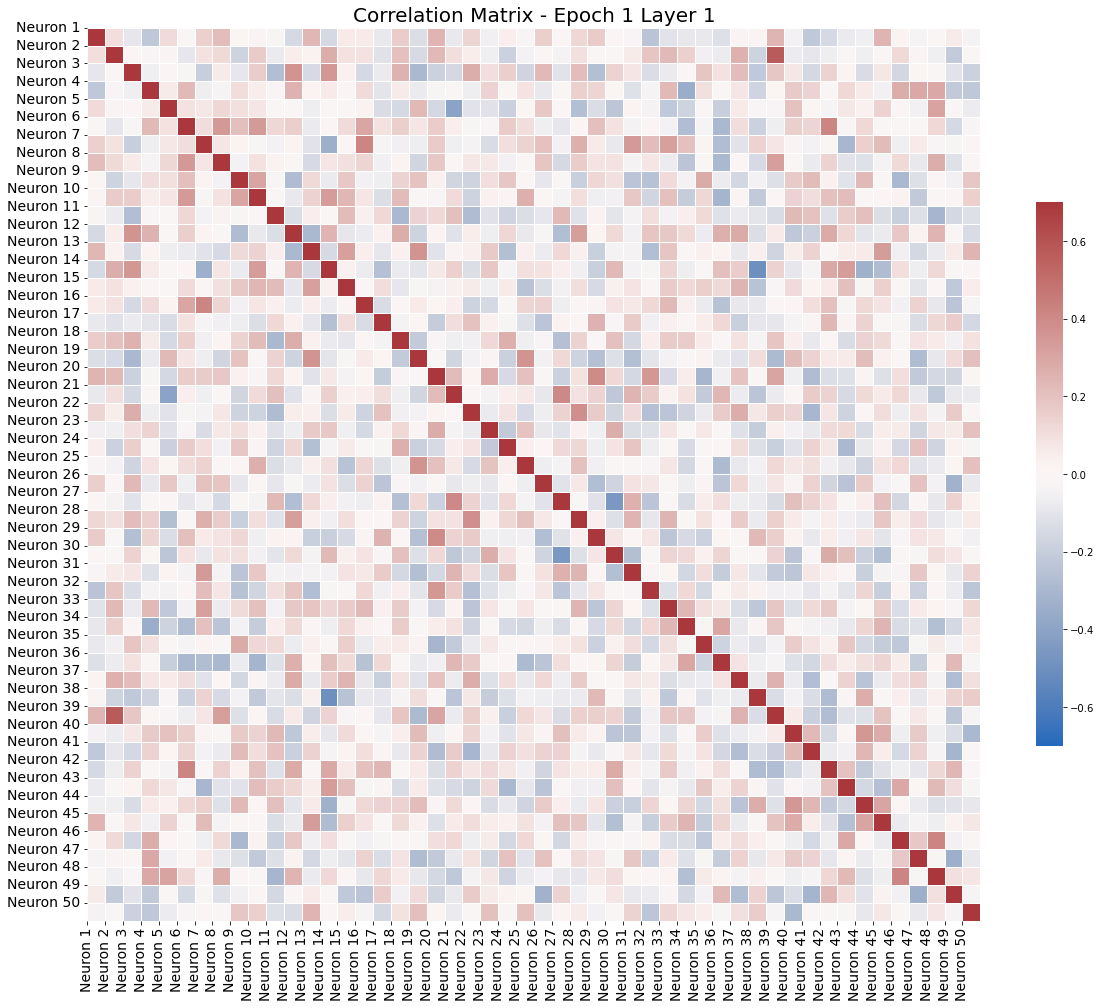

In [58]:
cor_mat01 = df01.corr() # correlations
f, ax = plt.subplots(figsize = (20,20)) # figure
cmap = sns.color_palette("vlag", as_cmap = True) # colour 
sns.heatmap(
    cor_mat01, # correlations
    cmap = cmap, # colour 
    #annot = True, # show values in cells? 
    vmax = 0.7, # max value on legend, >= .7 will be same color
    vmin = -0.7, # min value on the legend, <= .7 will be same color 
    square = True, # Force cells to be square 
    linewidth = .5, # width of lines that divide cells 
    cbar_kws = {"shrink": .5}
)
plt.xticks(range(df01.select_dtypes(['number']).shape[1]), df01.select_dtypes(['number']).columns, fontsize=14, rotation=90)
plt.yticks(range(df01.select_dtypes(['number']).shape[1]), df01.select_dtypes(['number']).columns, fontsize=14)
plt.title('Correlation Matrix - Epoch 1 Layer 1', fontsize=20);

In [59]:
n = 99 # weights for n+1th epoch
# hidden layer 1
df99 = pd.DataFrame(cbk2.weights[n], index = index_neuron , columns = weights_neuron)
df99 = df99.transpose()

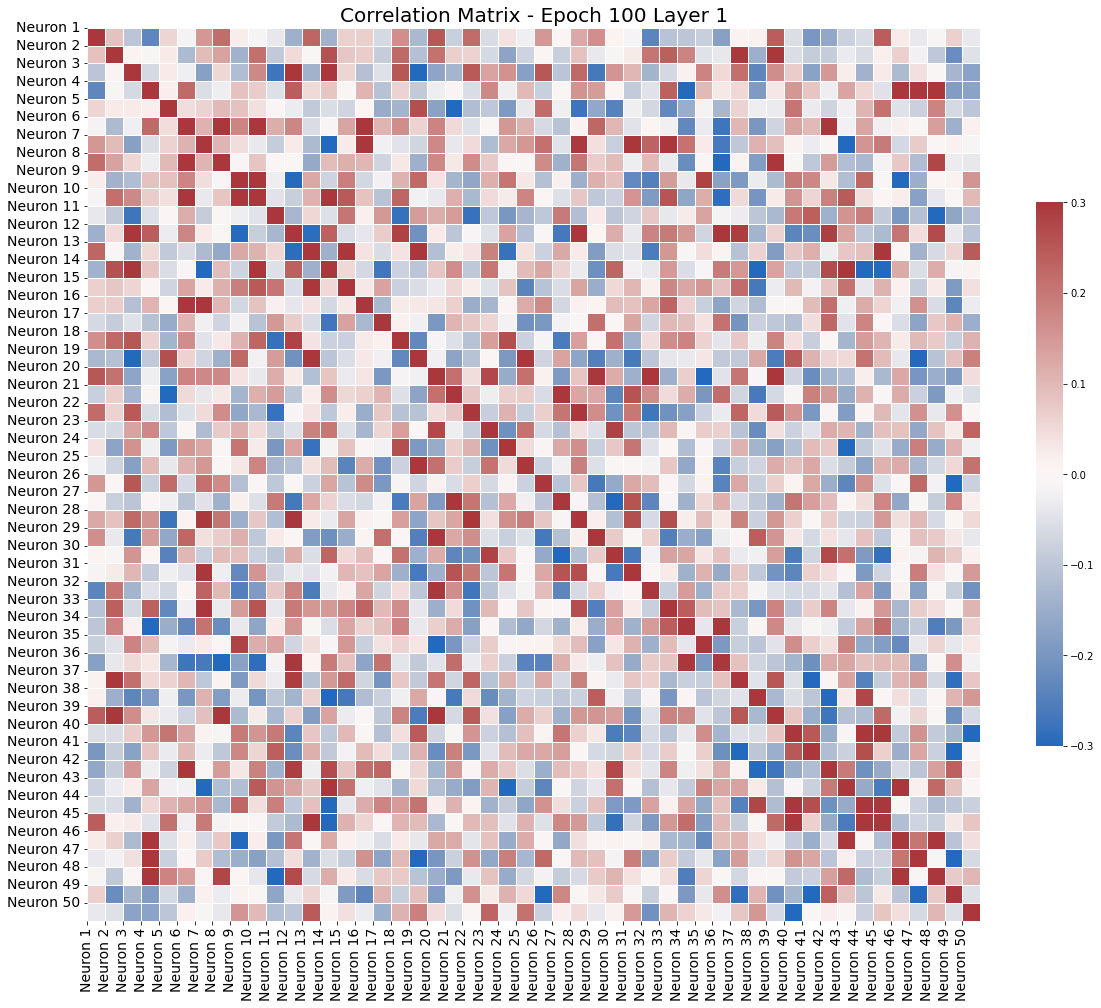

In [60]:
cor_mat = df99.corr() # correlations
f, ax = plt.subplots(figsize = (20,20)) # figure
cmap = sns.color_palette("vlag", as_cmap = True) # colour 
sns.heatmap(
    cor_mat, # correlations
    cmap = cmap, # colour 
    #annot = True, # show values in cells? 
    vmax = 0.3, # max value on legend, >= .7 will be same color
    vmin = -0.3, # min value on the legend, <= .7 will be same color 
    square = True, # Force cells to be square 
    linewidth = .5, # width of lines that divide cells 
    cbar_kws = {"shrink": .5}
)
plt.xticks(range(df99.select_dtypes(['number']).shape[1]), df99.select_dtypes(['number']).columns, fontsize=14, rotation=90)
plt.yticks(range(df99.select_dtypes(['number']).shape[1]), df99.select_dtypes(['number']).columns, fontsize=14)
plt.title('Correlation Matrix - Epoch 100 Layer 1', fontsize=20);

Graph of Neurons in Layer 1 Epoch 1

### Graphs

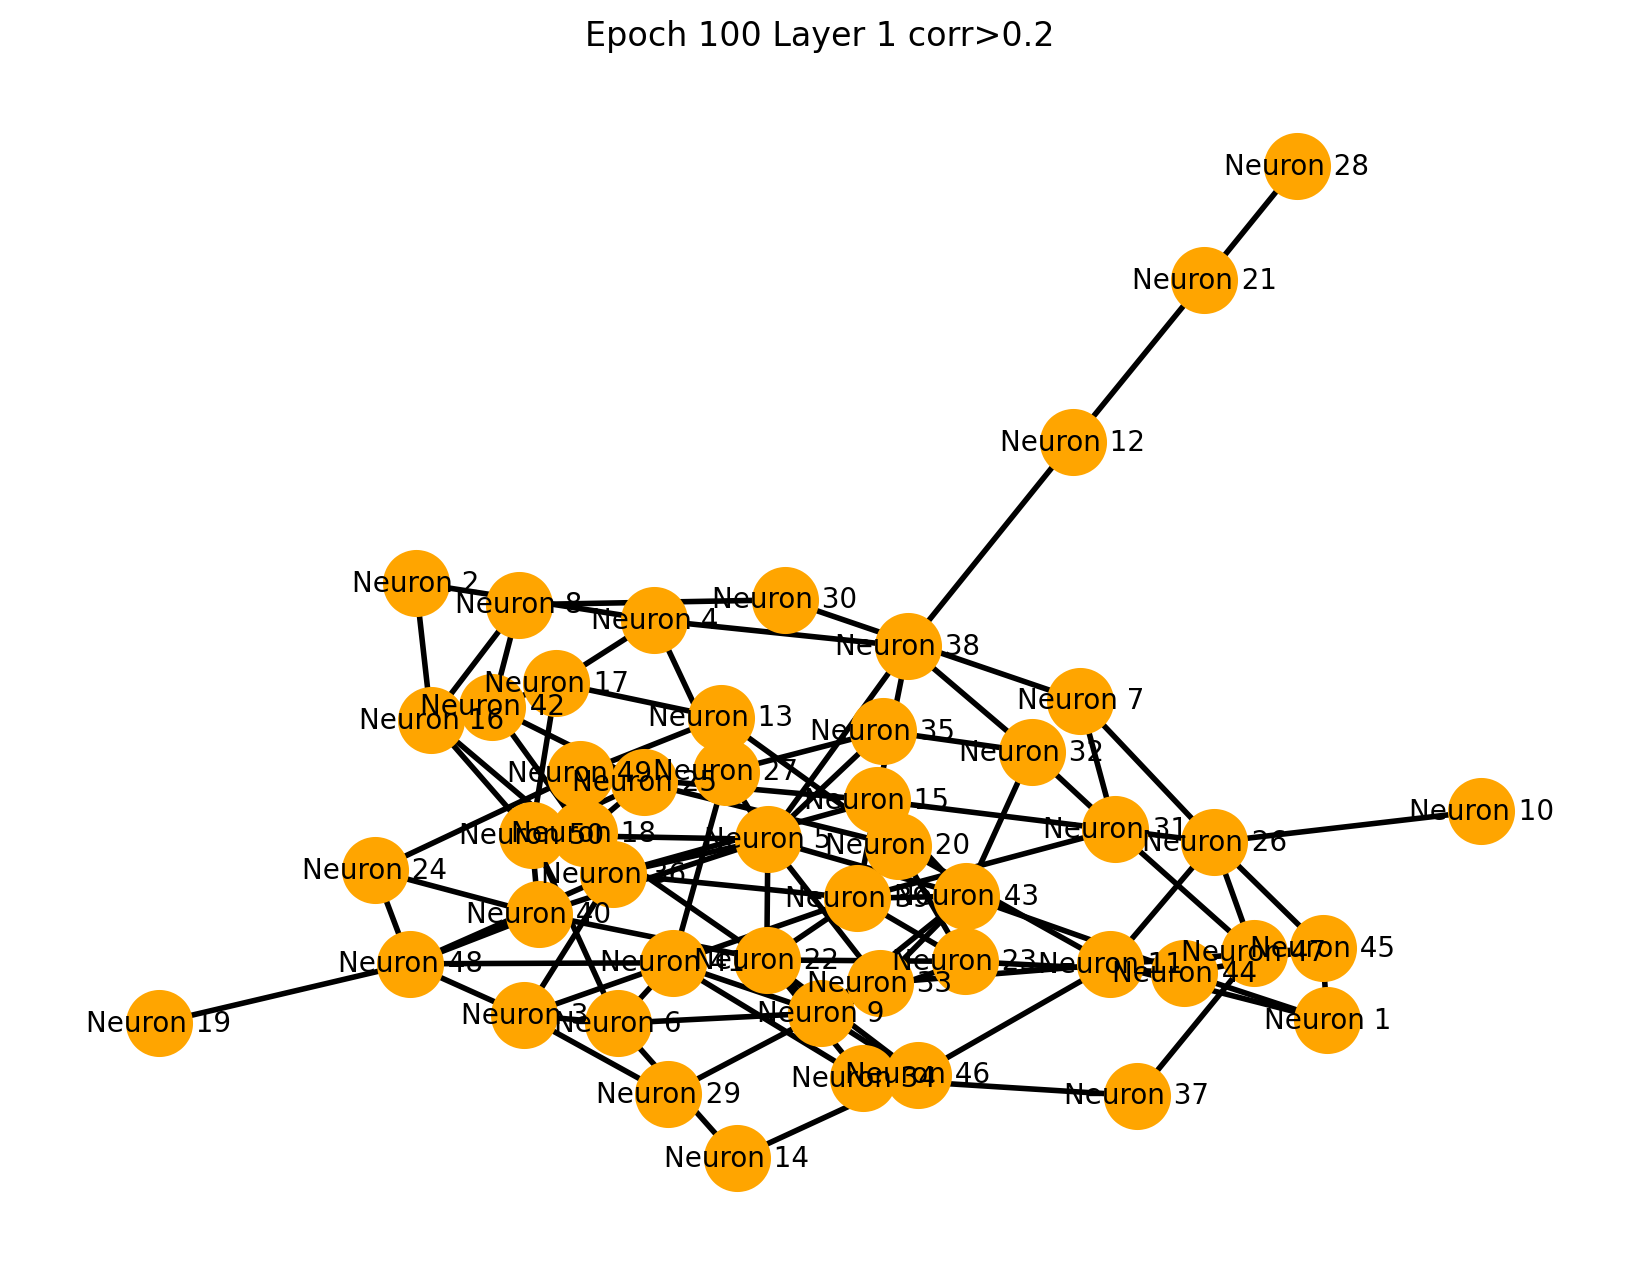

In [21]:
# make an edge list 

# converts lower triangular matrix to 0
cor_mat= cor_mat.mask(np.tril(np.ones(cor_mat.shape)).astype(np.bool_), 0) 

# creating edge list 
links = cor_mat.stack().reset_index()
links.columns = ['Neuron A', 'Neuron B', 'Value'] 
#drop the rows with 0 in Value 
rows_zero = links.loc[links['Value'] == 0.0]
links = links.drop(rows_zero.index)

# save values with correlation more than 0.2
links_filtered=links.loc[ (links['Value'] > abs(0.2)) ]

# make the graph 
G=nx.from_pandas_edgelist(links_filtered, 'Neuron A', 'Neuron B')
pos = nx.spring_layout(G)
#pos = nx.spectral_layout(G) 
# spectral layout helps us see how the community structure or other forms of structure in the graph. 
# It uses eigen vectors and eigen values to position the nodes. 

# plot the graph 
plt.figure(figsize=(8,6), dpi=200)
nx.draw(G, pos, with_labels=True, node_color='orange', width = 2, edge_color='black', linewidths=10, font_size=10, node_size = 200)
plt.title('Epoch 100 Layer 1 corr>0.2')
plt.show()

In [22]:
# make network grah
def make_graph(corr_mat, correlation_value):
    
    # make a for loop for graph layout
    p = correlation_value
    cor_mat = corr_mat
    # make an edge list 

    # converts lower triangular matrix to 0
    cor_mat= cor_mat.mask(np.tril(np.ones(cor_mat.shape)).astype(np.bool_), 0) 

    # creating edge list 
    links = cor_mat.stack().reset_index()
    links.columns = ['Neuron A', 'Neuron B', 'Value'] 
    #drop the rows with 0 in Value 
    rows_zero = links.loc[links['Value'] == 0.0]
    links = links.drop(rows_zero.index)

    # save values with correlation more than 0.2
    links_filtered=links.loc[ (links['Value'] > abs(p)) ]

    # make the graph 
    G=nx.from_pandas_edgelist(links_filtered, 'Neuron A', 'Neuron B')
    pos = nx.spring_layout(G)
    #pos = nx.spectral_layout(G) 
    # spectral layout helps us see how the community structure or other forms of structure in the graph. 
    # It uses eigen vectors and eigen values to position the nodes. 

    # plot the graph 
    plt.figure(figsize=(8,6), dpi=200)
    nx.draw(G, pos, with_labels=True, node_color='orange', width = 2, edge_color='black', linewidths=10, font_size=10, node_size = 200)
    plt.title('Epoch 100 Layer 1 corr>0.2')
    plt.show()

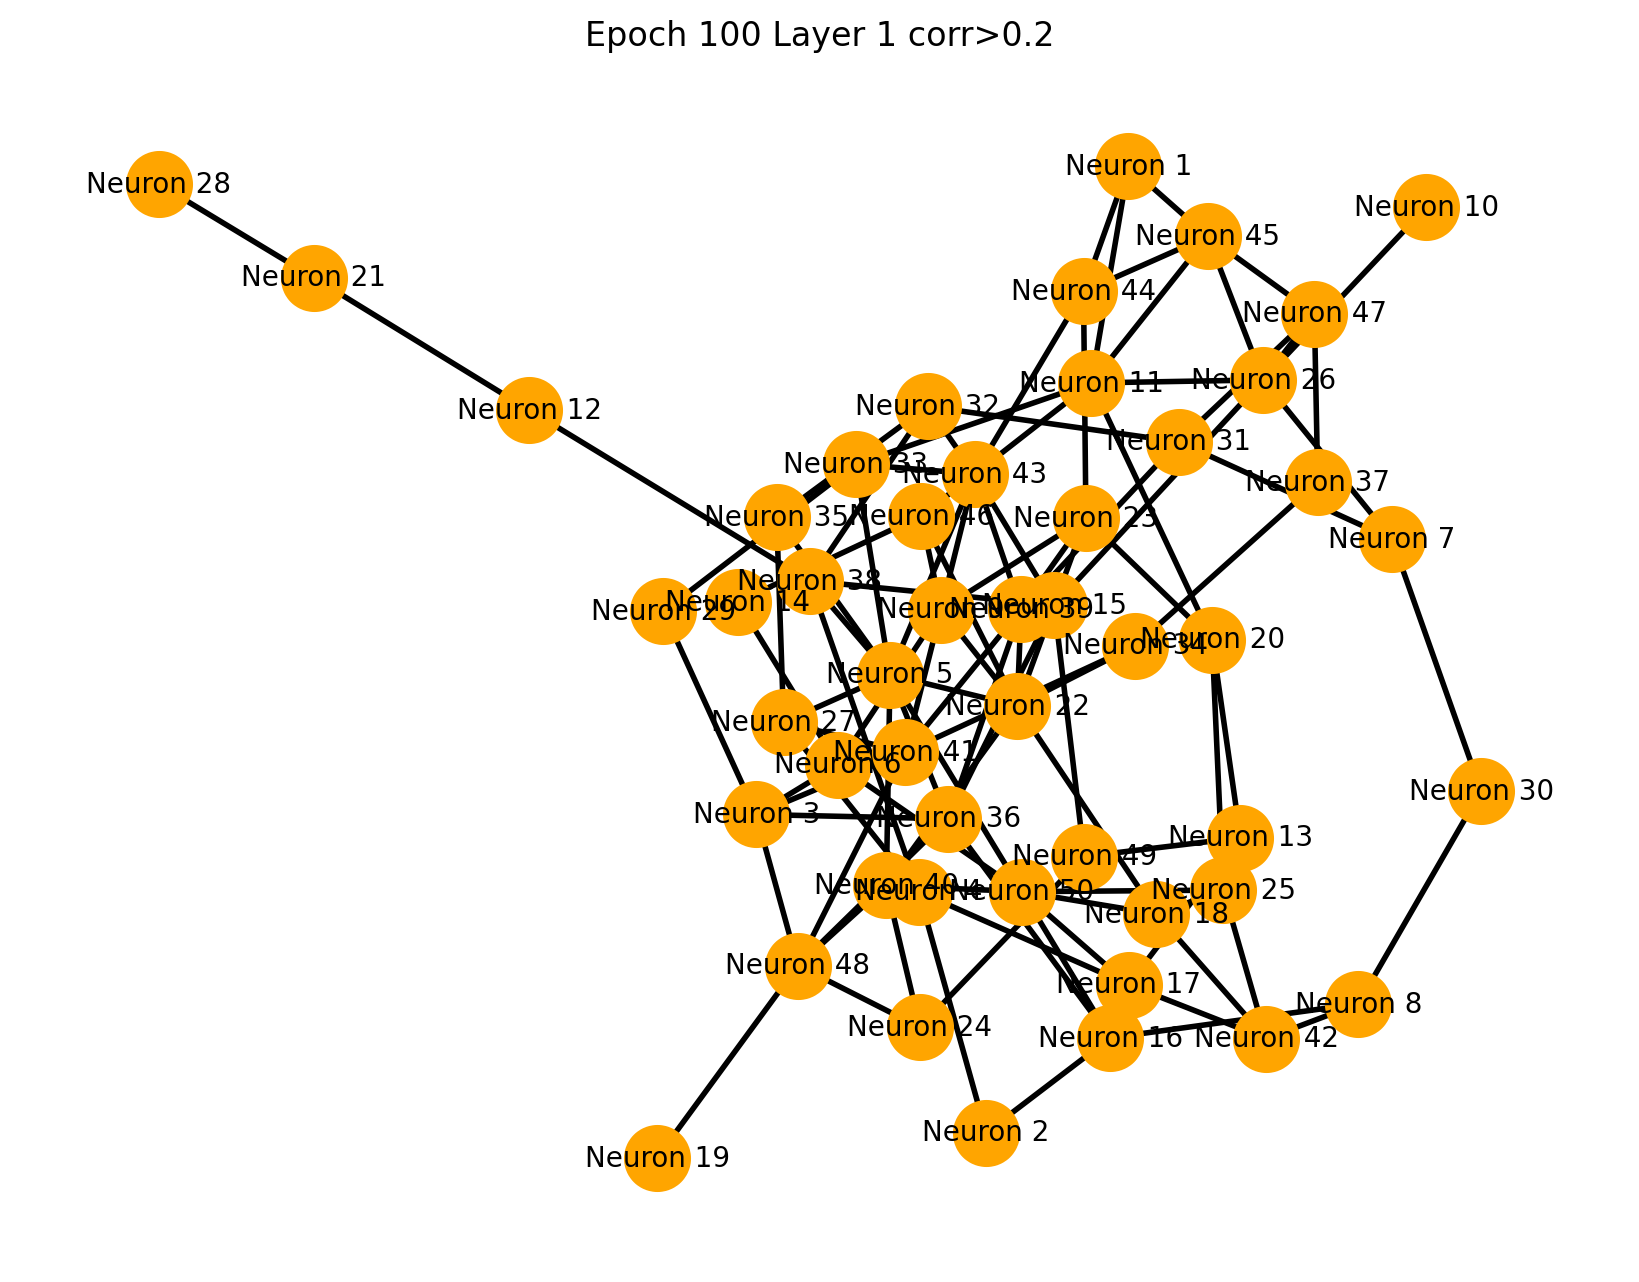

In [23]:
make_graph(cor_mat, 0.2)

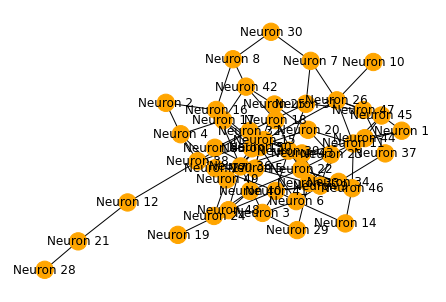

In [24]:
from networkx.algorithms.community.centrality import girvan_newman 
communities = girvan_newman(G)
node_groups = []
for com in (communities):
    node_groups.append(list(com))

#print(node_groups)

color_map = []
for node in G:
    if node in node_groups[0]:
        color_map.append("green")
    elif node in node_groups[1]:
        color_map.append("red")
    else:
        color_map.append("orange")
nx.draw(G, node_color=color_map, with_labels=True)
plt.show()

## Community Detection using Louvain - highest modularity

In [25]:
import community.community_louvain as community_louvain
# Detect communities using Louvain algorithm
partition = community_louvain.best_partition(G)

# Print the community membership of each node
#for node, community_id in partition.items():
#    print("Node", node, "belongs to community", community_id)

modularity = community_louvain.modularity(partition, G)
# print(modularity)

In [26]:
partition

{'Neuron 1': 0,
 'Neuron 11': 0,
 'Neuron 44': 0,
 'Neuron 45': 0,
 'Neuron 2': 2,
 'Neuron 4': 2,
 'Neuron 16': 2,
 'Neuron 3': 3,
 'Neuron 6': 4,
 'Neuron 29': 5,
 'Neuron 36': 3,
 'Neuron 41': 3,
 'Neuron 48': 3,
 'Neuron 17': 2,
 'Neuron 27': 5,
 'Neuron 38': 5,
 'Neuron 5': 5,
 'Neuron 22': 4,
 'Neuron 33': 5,
 'Neuron 35': 5,
 'Neuron 40': 1,
 'Neuron 43': 5,
 'Neuron 50': 2,
 'Neuron 9': 4,
 'Neuron 14': 4,
 'Neuron 7': 0,
 'Neuron 26': 0,
 'Neuron 30': 0,
 'Neuron 31': 0,
 'Neuron 8': 2,
 'Neuron 42': 2,
 'Neuron 23': 4,
 'Neuron 46': 4,
 'Neuron 10': 0,
 'Neuron 20': 1,
 'Neuron 12': 5,
 'Neuron 21': 5,
 'Neuron 13': 1,
 'Neuron 49': 1,
 'Neuron 15': 3,
 'Neuron 39': 3,
 'Neuron 18': 2,
 'Neuron 25': 2,
 'Neuron 19': 3,
 'Neuron 28': 5,
 'Neuron 34': 4,
 'Neuron 24': 1,
 'Neuron 47': 0,
 'Neuron 32': 5,
 'Neuron 37': 4}

In [27]:
# Prints the list of communities
new_dict = {}
for key, value in partition.items():
    new_dict.setdefault(value, []).append(key)

# Convert the dictionary of lists into a list of lists
result = list(new_dict.values())

In [28]:
len(result)

6

### Modularity - Using Louvain Algorithm

# The Modularity Function - Change over time - Layer 1

In [85]:
# Correlation matrix for every epoch of Hidden Layer 1
corr_mat_epoch = []
for n in range(numEpochs):
    df = pd.DataFrame(cbk2.weights[n], index = index_neuron , columns = weights_neuron)
    df = df.transpose() 
    df = df.corr()
    df = df.mask(np.tril(np.ones(df.shape)).astype(np.bool_), 0) 
    corr_mat_epoch.append(df)

In [86]:
# finding modularity for each matrix 
modularity_layer1 = []
communities_layer1 = []
for n in range(numEpochs):
    cor_mat = corr_mat_epoch[n]
        # creating edge list 
    links = cor_mat.stack().reset_index()
    links.columns = ['Neuron A', 'Neuron B', 'Value'] 
    # drop the rows with 0 in Value 
    rows_zero = links.loc[links['Value'] == 0.0]
    links = links.drop(rows_zero.index)

    # save values with correlation more than 0.2
    links_filtered=links.loc[ (links['Value'] > abs(0.2)) ]

    # make the graph 
    G=nx.from_pandas_edgelist(links_filtered, 'Neuron A', 'Neuron B')
    pos = nx.spring_layout(G) 

    # calculate modularity 
    # Detect communities using Louvain algorithm
    partition = community_louvain.best_partition(G)
    
    # list of communities
    new_dict = {}
    for key, value in partition.items():
        new_dict.setdefault(value, []).append(key)
    # Convert the dictionary of lists into a list of lists
    result = list(new_dict.values())
    
    communities_layer1.append(len(result))

    modularity = community_louvain.modularity(partition, G)
    
    modularity_layer1.append(modularity)

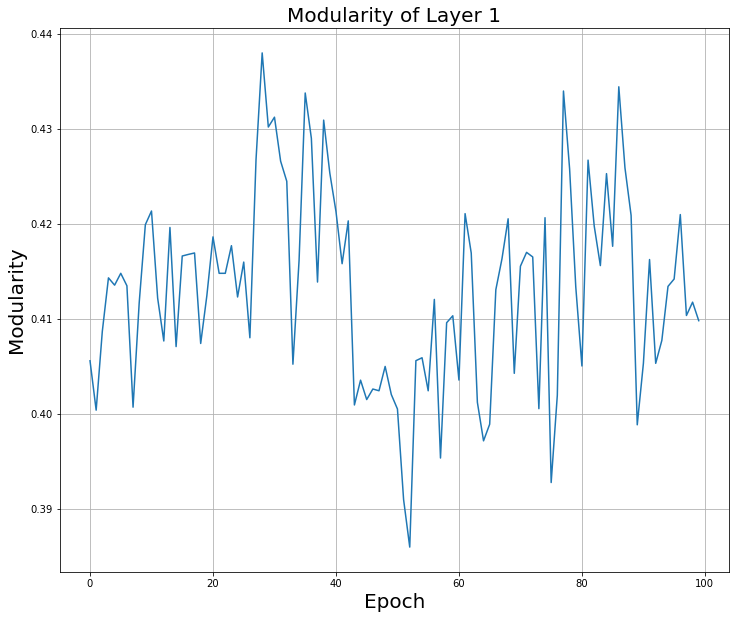

In [87]:
plt.figure(figsize=(12,10))
plt.plot(modularity_layer1)
plt.xlabel("Epoch", fontsize = 20)
plt.ylabel("Modularity", fontsize = 20)
plt.title("Modularity of Layer 1", fontsize = 20)
plt.grid(True)
plt.show()

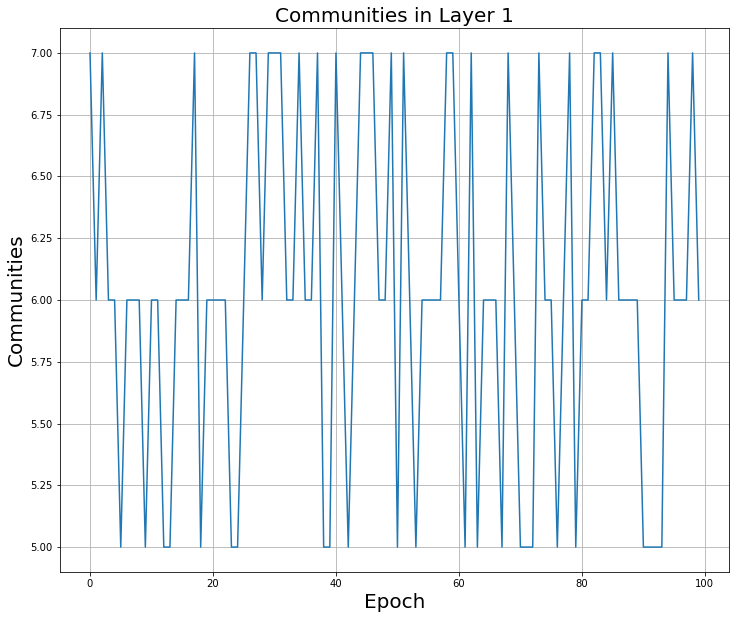

In [88]:
plt.figure(figsize=(12,10))
plt.plot(communities_layer1)
plt.xlabel("Epoch", fontsize = 20)
plt.ylabel("Communities", fontsize = 20)
plt.title("Communities in Layer 1", fontsize = 20)
plt.grid(True)
plt.show()

# Modularity - Layer 2  

In [89]:
# Correlation matrix for every epoch of Hidden Layer 1
corr_mat_epoch_l2 = []
for n in range(numEpochs):
    df = pd.DataFrame(cbk4.weights[n], index = index_neuron , columns = weights_neuron)
    df = df.transpose() 
    df = df.corr()
    df = df.mask(np.tril(np.ones(df.shape)).astype(np.bool_), 0) 
    corr_mat_epoch_l2.append(df)

In [90]:
# finding modularity for each matrix 
modularity_layer2 = []
communities_layer2 = []
for n in range(numEpochs):
    cor_mat = corr_mat_epoch_l2[n]
        # creating edge list 
    links = cor_mat.stack().reset_index()
    links.columns = ['Neuron A', 'Neuron B', 'Value'] 
    # drop the rows with 0 in Value 
    rows_zero = links.loc[links['Value'] == 0.0]
    links = links.drop(rows_zero.index)

    # save values with correlation more than 0.2
    links_filtered=links.loc[ (links['Value'] > abs(0.2)) ]

    # make the graph 
    G=nx.from_pandas_edgelist(links_filtered, 'Neuron A', 'Neuron B')
    pos = nx.spring_layout(G) 
    
    # calculate modularity 
    # Detect communities using Louvain algorithm
    partition = community_louvain.best_partition(G)
    
    # list of communities
    new_dict = {}
    for key, value in partition.items():
        new_dict.setdefault(value, []).append(key)
    # Convert the dictionary of lists into a list of lists
    result = list(new_dict.values())
    
    communities_layer2.append(len(result))

    modularity = community_louvain.modularity(partition, G)
    
    modularity_layer2.append(modularity)

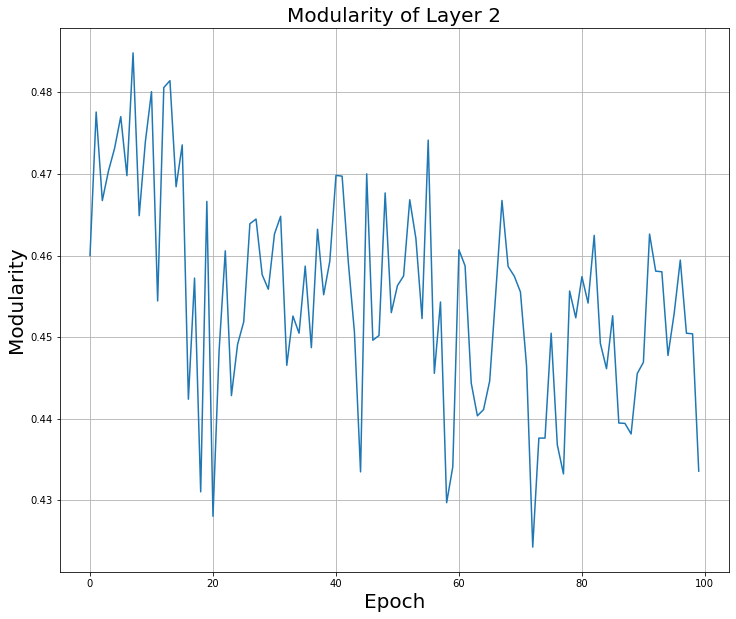

In [91]:
plt.figure(figsize=(12,10))
plt.plot(modularity_layer2)
plt.xlabel("Epoch", fontsize = 20)
plt.ylabel("Modularity", fontsize = 20)
plt.title("Modularity of Layer 2", fontsize = 20)
plt.grid(True)
plt.show()

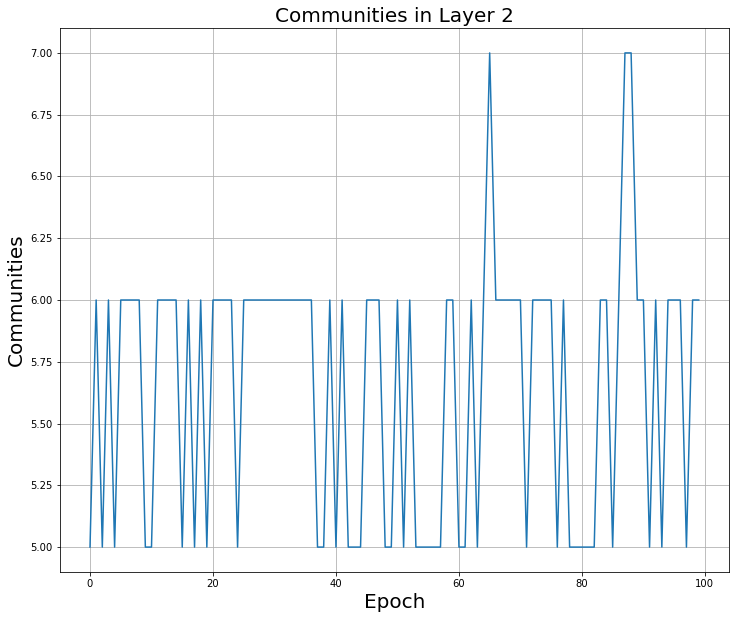

In [92]:
plt.figure(figsize=(12,10))
plt.plot(communities_layer2)
plt.xlabel("Epoch", fontsize = 20)
plt.ylabel("Communities", fontsize = 20)
plt.title("Communities in Layer 2", fontsize = 20)
plt.grid(True)
plt.show()

# Modularity Function - Change Over Time - Layer 3

In [93]:
# Correlation matrix for every epoch of Hidden Layer 1
corr_mat_epoch_l3 = []
for n in range(numEpochs):
    df = pd.DataFrame(cbk6.weights[n], index = index_neuron , columns = weights_neuron)
    df = df.transpose()
    df = df.corr()
    df = df.mask(np.tril(np.ones(df.shape)).astype(np.bool_), 0) 
    corr_mat_epoch_l3.append(df)

In [94]:
# finding modularity for each matrix 
modularity_layer3 = []
communities_layer3 = []
for n in range(numEpochs):
    cor_mat = corr_mat_epoch_l3[n]
        # creating edge list 
    links = cor_mat.stack().reset_index()
    links.columns = ['Neuron A', 'Neuron B', 'Value'] 
    # drop the rows with 0 in Value 
    rows_zero = links.loc[links['Value'] == 0.0]
    links = links.drop(rows_zero.index)

    # save values with correlation more than 0.2
    links_filtered=links.loc[ (links['Value'] > abs(0.2)) ]

    # make the graph 
    G=nx.from_pandas_edgelist(links_filtered, 'Neuron A', 'Neuron B')
    pos = nx.spring_layout(G) 

    # calculate modularity 
    # Detect communities using Louvain algorithm
    partition = community_louvain.best_partition(G)
    
    # list of communities
    new_dict = {}
    for key, value in partition.items():
        new_dict.setdefault(value, []).append(key)
    # Convert the dictionary of lists into a list of lists
    result = list(new_dict.values())
    
    communities_layer3.append(len(result))

    modularity = community_louvain.modularity(partition, G)
    
    modularity_layer3.append(modularity)

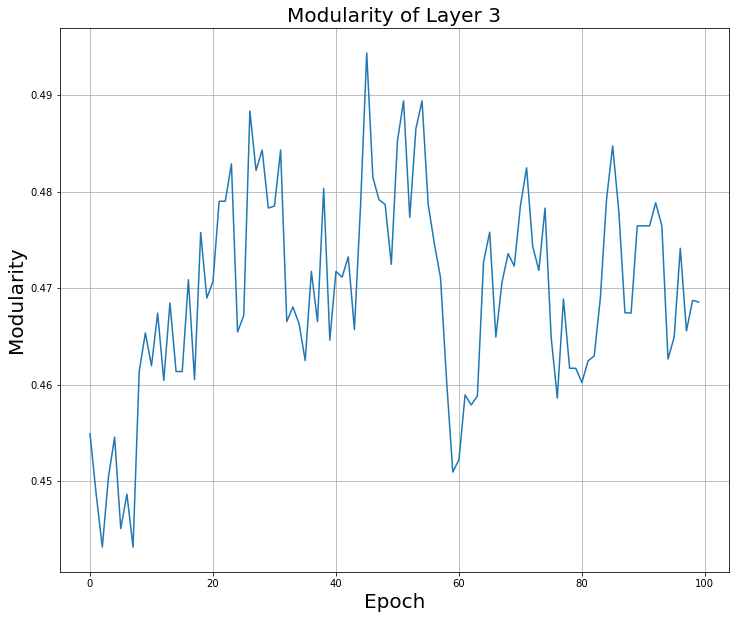

In [95]:
plt.figure(figsize=(12,10))
plt.plot(modularity_layer3)
plt.xlabel("Epoch", fontsize = 20)
plt.ylabel("Modularity", fontsize = 20)
plt.title("Modularity of Layer 3", fontsize = 20)
#ax2 = plt.twiny()
#ax2.plot(pd.Series(np.random.uniform(10, 20, size=10)), color='r')
#ax2.grid(None)
plt.grid(True)
plt.show()

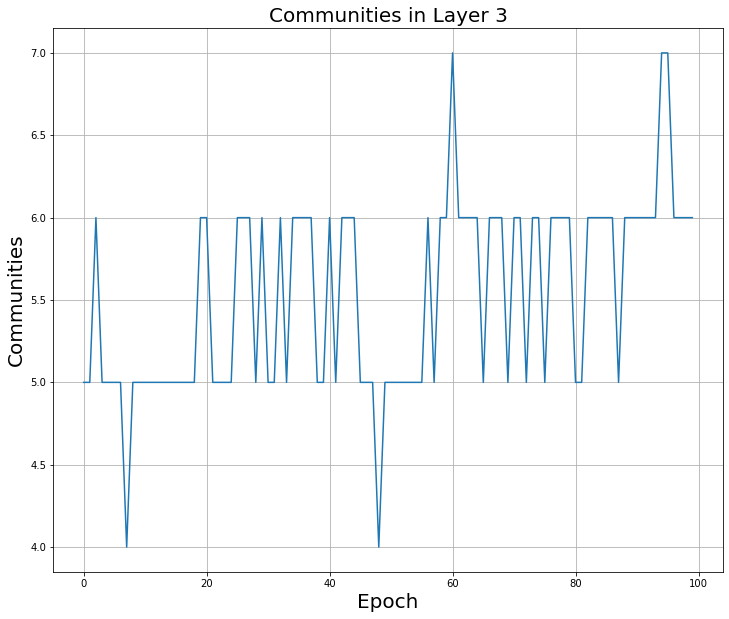

In [96]:
plt.figure(figsize=(12,10))
plt.plot(communities_layer3)
plt.xlabel("Epoch", fontsize = 20)
plt.ylabel("Communities", fontsize = 20)
plt.title("Communities in Layer 3", fontsize = 20)
plt.grid(True)
plt.show()

# Modularity Function - Change Over Time - Layer 3

In [97]:
# Correlation matrix for every epoch of Hidden Layer 1
corr_mat_epoch_l4 = []
for n in range(numEpochs):
    df = pd.DataFrame(cbk8.weights[n], index = index_neuron , columns = weights_neuron)
    df = df.transpose()
    df = df.corr()
    df = df.mask(np.tril(np.ones(df.shape)).astype(np.bool_), 0) 
    corr_mat_epoch_l4.append(df)

In [98]:
# finding modularity for each matrix 
modularity_layer4 = []
communities_layer4 = []
for n in range(numEpochs):
    cor_mat = corr_mat_epoch_l4[n]
        # creating edge list 
    links = cor_mat.stack().reset_index()
    links.columns = ['Neuron A', 'Neuron B', 'Value'] 
    # drop the rows with 0 in Value 
    rows_zero = links.loc[links['Value'] == 0.0]
    links = links.drop(rows_zero.index)

    # save values with correlation more than 0.2
    links_filtered=links.loc[ (links['Value'] > abs(0.2)) ]

    # make the graph 
    G=nx.from_pandas_edgelist(links_filtered, 'Neuron A', 'Neuron B')
    pos = nx.spring_layout(G) 

    # calculate modularity 
    # Detect communities using Louvain algorithm
    partition = community_louvain.best_partition(G)
    
    # list of communities
    new_dict = {}
    for key, value in partition.items():
        new_dict.setdefault(value, []).append(key)
    # Convert the dictionary of lists into a list of lists
    result = list(new_dict.values())
    
    communities_layer4.append(len(result))

    modularity = community_louvain.modularity(partition, G)
    
    modularity_layer4.append(modularity)

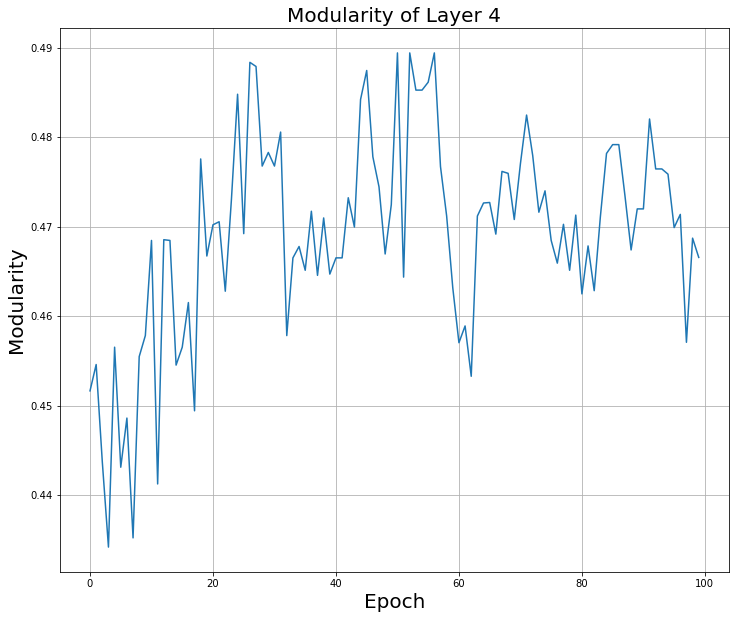

In [99]:
plt.figure(figsize=(12,10))
plt.plot(modularity_layer4)
plt.xlabel("Epoch", fontsize = 20)
plt.ylabel("Modularity", fontsize = 20)
plt.title("Modularity of Layer 4", fontsize = 20)
plt.grid(True)
plt.show()

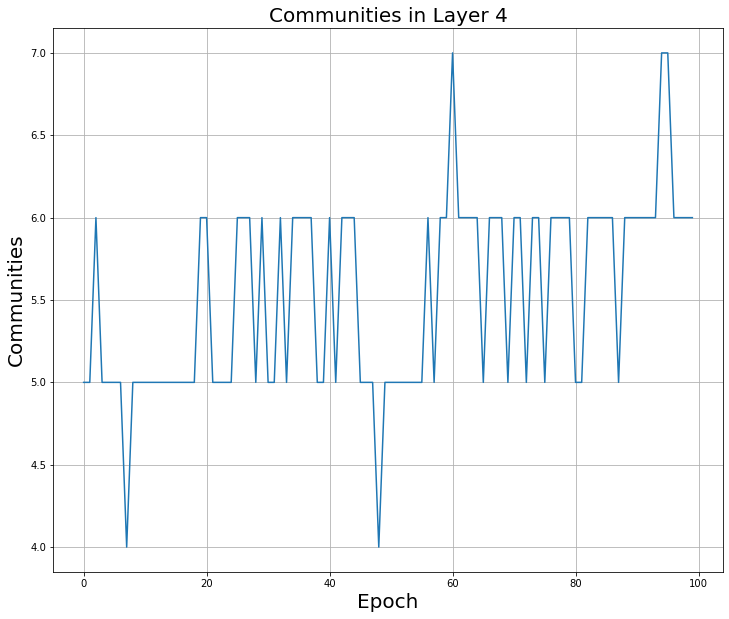

In [100]:
plt.figure(figsize=(12,10))
plt.plot(communities_layer3)
plt.xlabel("Epoch", fontsize = 20)
plt.ylabel("Communities", fontsize = 20)
plt.title("Communities in Layer 4", fontsize = 20)
plt.grid(True)
plt.show()

In [101]:
#Layer 5
# Correlation matrix for every epoch of Hidden Layer 1
corr_mat_epoch_l5 = []
for n in range(numEpochs):
    df = pd.DataFrame(cbk10.weights[n], index = index_neuron , columns = weights_neuron)
    df = df.transpose()
    df = df.corr()
    df = df.mask(np.tril(np.ones(df.shape)).astype(np.bool_), 0) 
    corr_mat_epoch_l5.append(df)

# finding modularity for each matrix 
modularity_layer5 = []
communities_layer5 = []
for n in range(numEpochs):
    cor_mat = corr_mat_epoch_l5[n]
        # creating edge list 
    links = cor_mat.stack().reset_index()
    links.columns = ['Neuron A', 'Neuron B', 'Value'] 
    # drop the rows with 0 in Value 
    rows_zero = links.loc[links['Value'] == 0.0]
    links = links.drop(rows_zero.index)

    # save values with correlation more than 0.2
    links_filtered=links.loc[ (links['Value'] > abs(0.2)) ]

    # make the graph 
    G=nx.from_pandas_edgelist(links_filtered, 'Neuron A', 'Neuron B')
    pos = nx.spring_layout(G) 

    # calculate modularity 
    # Detect communities using Louvain algorithm
    partition = community_louvain.best_partition(G)
    
    # list of communities
    new_dict = {}
    for key, value in partition.items():
        new_dict.setdefault(value, []).append(key)
    # Convert the dictionary of lists into a list of lists
    result = list(new_dict.values())
    
    communities_layer5.append(len(result))

    modularity = community_louvain.modularity(partition, G)
    
    modularity_layer5.append(modularity)

In [102]:
#Layer 6
# Correlation matrix for every epoch of Hidden Layer 1
corr_mat_epoch_l6 = []
for n in range(numEpochs):
    df = pd.DataFrame(cbk12.weights[n], index = index_neuron , columns = weights_neuron)
    df = df.transpose()
    df = df.corr()
    df = df.mask(np.tril(np.ones(df.shape)).astype(np.bool_), 0) 
    corr_mat_epoch_l6.append(df)

# finding modularity for each matrix 
modularity_layer6 = []
communities_layer6 = []
for n in range(numEpochs):
    cor_mat = corr_mat_epoch_l6[n]
        # creating edge list 
    links = cor_mat.stack().reset_index()
    links.columns = ['Neuron A', 'Neuron B', 'Value'] 
    # drop the rows with 0 in Value 
    rows_zero = links.loc[links['Value'] == 0.0]
    links = links.drop(rows_zero.index)

    # save values with correlation more than 0.2
    links_filtered=links.loc[ (links['Value'] > abs(0.2)) ]

    # make the graph 
    G=nx.from_pandas_edgelist(links_filtered, 'Neuron A', 'Neuron B')
    pos = nx.spring_layout(G) 

    # calculate modularity 
    # Detect communities using Louvain algorithm
    partition = community_louvain.best_partition(G)
    
    # list of communities
    new_dict = {}
    for key, value in partition.items():
        new_dict.setdefault(value, []).append(key)
    # Convert the dictionary of lists into a list of lists
    result = list(new_dict.values())
    
    communities_layer6.append(len(result))

    modularity = community_louvain.modularity(partition, G)
    
    modularity_layer6.append(modularity)

In [103]:
#Layer 7
# Correlation matrix for every epoch of Hidden Layer 1
corr_mat_epoch_l7 = []
for n in range(numEpochs):
    df = pd.DataFrame(cbk14.weights[n], index = index_neuron , columns = weights_neuron)
    df = df.transpose()
    df = df.corr()
    df = df.mask(np.tril(np.ones(df.shape)).astype(np.bool_), 0) 
    corr_mat_epoch_l7.append(df)

# finding modularity for each matrix 
modularity_layer7 = []
communities_layer7 = []
for n in range(numEpochs):
    cor_mat = corr_mat_epoch_l7[n]
        # creating edge list 
    links = cor_mat.stack().reset_index()
    links.columns = ['Neuron A', 'Neuron B', 'Value'] 
    # drop the rows with 0 in Value 
    rows_zero = links.loc[links['Value'] == 0.0]
    links = links.drop(rows_zero.index)

    # save values with correlation more than 0.2
    links_filtered=links.loc[ (links['Value'] > abs(0.2)) ]

    # make the graph 
    G=nx.from_pandas_edgelist(links_filtered, 'Neuron A', 'Neuron B')
    pos = nx.spring_layout(G) 

    # calculate modularity 
    # Detect communities using Louvain algorithm
    partition = community_louvain.best_partition(G)
    
    # list of communities
    new_dict = {}
    for key, value in partition.items():
        new_dict.setdefault(value, []).append(key)
    # Convert the dictionary of lists into a list of lists
    result = list(new_dict.values())
    
    communities_layer7.append(len(result))

    modularity = community_louvain.modularity(partition, G)
    
    modularity_layer7.append(modularity)

In [104]:
#Layer 8
# Correlation matrix for every epoch of Hidden Layer 1
corr_mat_epoch_l8 = []
for n in range(numEpochs):
    df = pd.DataFrame(cbk16.weights[n], index = index_neuron , columns = weights_neuron)
    df = df.transpose()
    df = df.corr()
    df = df.mask(np.tril(np.ones(df.shape)).astype(np.bool_), 0) 
    corr_mat_epoch_l8.append(df)

# finding modularity for each matrix 
modularity_layer8 = []
communities_layer8 = []
for n in range(numEpochs):
    cor_mat = corr_mat_epoch_l8[n]
        # creating edge list 
    links = cor_mat.stack().reset_index()
    links.columns = ['Neuron A', 'Neuron B', 'Value'] 
    # drop the rows with 0 in Value 
    rows_zero = links.loc[links['Value'] == 0.0]
    links = links.drop(rows_zero.index)

    # save values with correlation more than 0.2
    links_filtered=links.loc[ (links['Value'] > abs(0.2)) ]

    # make the graph 
    G=nx.from_pandas_edgelist(links_filtered, 'Neuron A', 'Neuron B')
    pos = nx.spring_layout(G) 

    # calculate modularity 
    # Detect communities using Louvain algorithm
    partition = community_louvain.best_partition(G)
    
    # list of communities
    new_dict = {}
    for key, value in partition.items():
        new_dict.setdefault(value, []).append(key)
    # Convert the dictionary of lists into a list of lists
    result = list(new_dict.values())
    
    communities_layer8.append(len(result))

    modularity = community_louvain.modularity(partition, G)
    
    modularity_layer8.append(modularity)

In [105]:
#Layer 9
# Correlation matrix for every epoch of Hidden Layer 1
corr_mat_epoch_l9 = []
for n in range(numEpochs):
    df = pd.DataFrame(cbk18.weights[n], index = index_neuron , columns = weights_neuron)
    df = df.transpose()
    df = df.corr()
    df = df.mask(np.tril(np.ones(df.shape)).astype(np.bool_), 0) 
    corr_mat_epoch_l9.append(df)

# finding modularity for each matrix 
modularity_layer9 = []
communities_layer9 = []
for n in range(numEpochs):
    cor_mat = corr_mat_epoch_l9[n]
        # creating edge list 
    links = cor_mat.stack().reset_index()
    links.columns = ['Neuron A', 'Neuron B', 'Value'] 
    # drop the rows with 0 in Value 
    rows_zero = links.loc[links['Value'] == 0.0]
    links = links.drop(rows_zero.index)

    # save values with correlation more than 0.2
    links_filtered=links.loc[ (links['Value'] > abs(0.2)) ]

    # make the graph 
    G=nx.from_pandas_edgelist(links_filtered, 'Neuron A', 'Neuron B')
    pos = nx.spring_layout(G) 

    # calculate modularity 
    # Detect communities using Louvain algorithm
    partition = community_louvain.best_partition(G)
    
    # list of communities
    new_dict = {}
    for key, value in partition.items():
        new_dict.setdefault(value, []).append(key)
    # Convert the dictionary of lists into a list of lists
    result = list(new_dict.values())
    
    communities_layer9.append(len(result))

    modularity = community_louvain.modularity(partition, G)
    
    modularity_layer9.append(modularity)

# Modularity Function - Change over time - all layers 

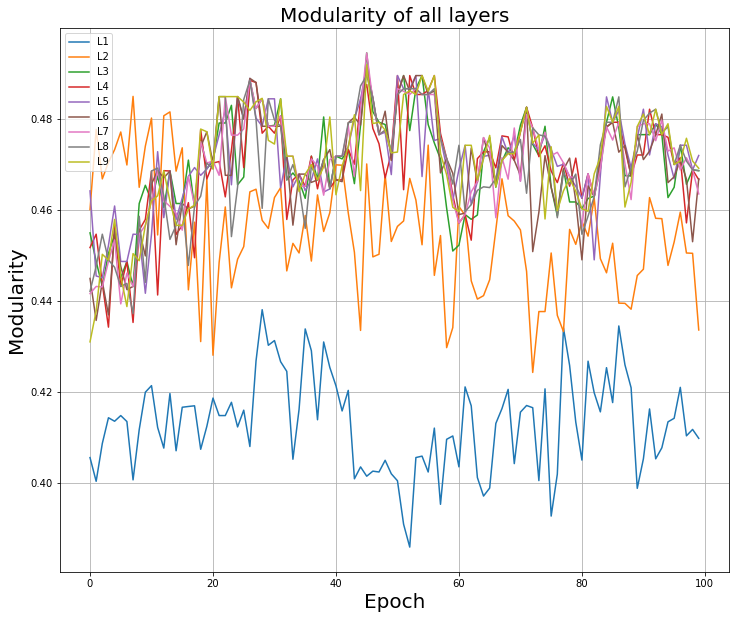

In [106]:
plt.figure(figsize=(12,10))
plt.plot(modularity_layer1)
plt.plot(modularity_layer2)
plt.plot(modularity_layer3)
plt.plot(modularity_layer4)
plt.plot(modularity_layer5)
plt.plot(modularity_layer6)
plt.plot(modularity_layer7)
plt.plot(modularity_layer8)
plt.plot(modularity_layer9)
plt.xlabel("Epoch", fontsize = 20)
plt.ylabel("Modularity", fontsize = 20)
plt.title("Modularity of all layers", fontsize = 20)
plt.legend(['L1', 'L2', 'L3', 'L4', 'L5', 'L6', 'L7', 'L8', 'L9'])
plt.grid(True)
plt.show()

# Number of Communities for layers in every epoch

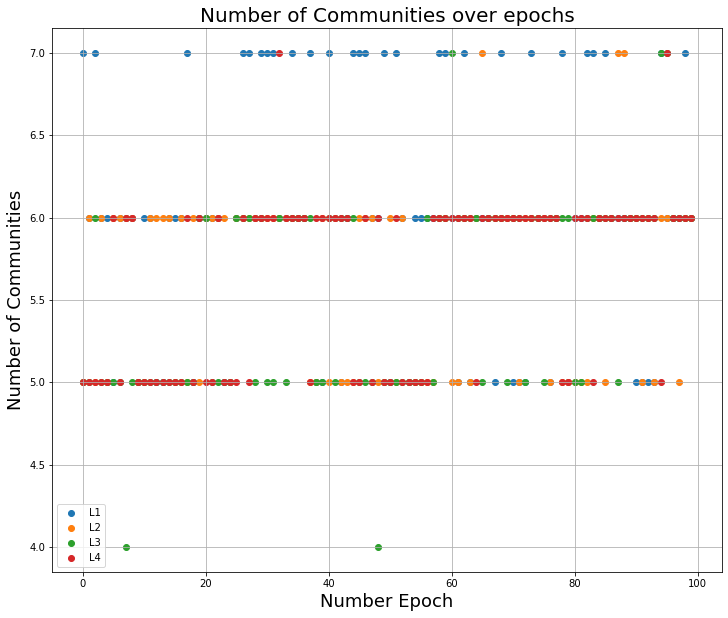

In [116]:
plt.figure(figsize=(12, 10))
plt.scatter(range(100), communities_layer1)
plt.scatter(range(100), communities_layer2)
plt.scatter(range(100), communities_layer3)
plt.scatter(range(100), communities_layer4)
plt.xlabel('Number Epoch', fontsize = 18)
plt.ylabel('Number of Communities', fontsize = 18)
plt.title('Number of Communities over epochs', fontsize= 20)
plt.legend(['L1', 'L2', 'L3', 'L4', 'L5', 'L6', 'L7', 'L8', 'L9'])
plt.grid(True)
plt.show()

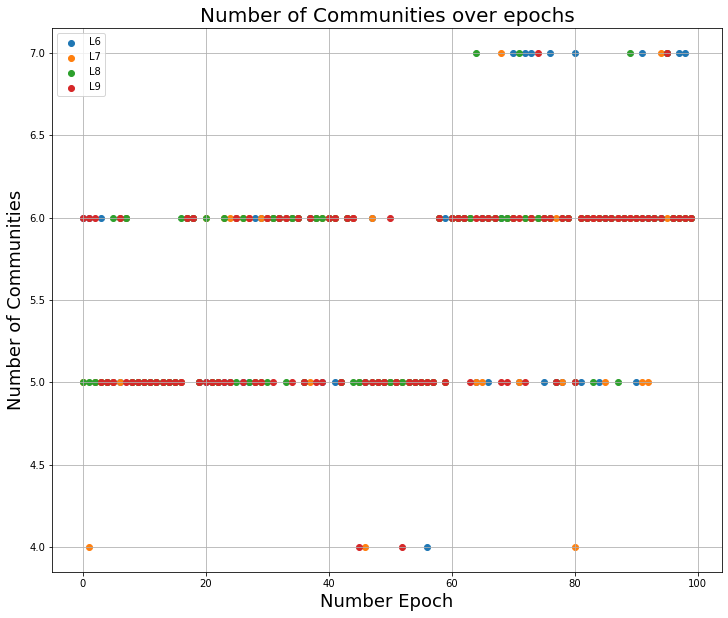

In [117]:
plt.figure(figsize=(12, 10))
plt.scatter(range(100), communities_layer6)
plt.scatter(range(100), communities_layer7)
plt.scatter(range(100), communities_layer8)
plt.scatter(range(100), communities_layer9)
plt.xlabel('Number Epoch', fontsize = 18)
plt.ylabel('Number of Communities', fontsize = 18)
plt.title('Number of Communities over epochs', fontsize= 20)
plt.legend(['L6', 'L7', 'L8', 'L9'])
plt.grid(True)
plt.show()

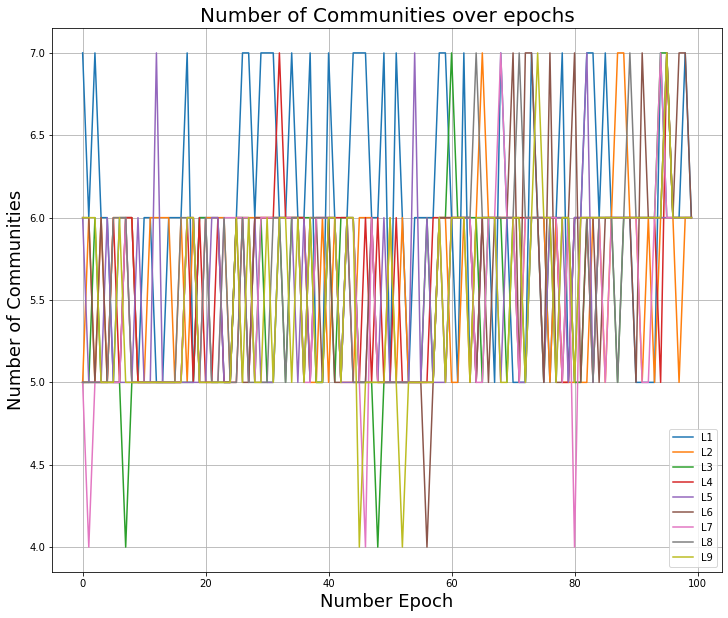

In [109]:
plt.figure(figsize=(12, 10))
plt.plot(range(100), communities_layer1)
plt.plot(range(100), communities_layer2)
plt.plot(range(100), communities_layer3)
plt.plot(range(100), communities_layer4)
plt.plot(range(100), communities_layer5)
plt.plot(range(100), communities_layer6)
plt.plot(range(100), communities_layer7)
plt.plot(range(100), communities_layer8)
plt.plot(range(100), communities_layer9)
plt.xlabel('Number Epoch', fontsize = 18)
plt.ylabel('Number of Communities', fontsize = 18)
plt.title('Number of Communities over epochs', fontsize= 20)
plt.legend(['L1', 'L2', 'L3', 'L4', 'L5', 'L6', 'L7', 'L8', 'L9'])
plt.grid(True)
plt.show()

# Mann Whitney Test 

In [43]:
from scipy.stats import mannwhitneyu 

In [44]:
statistic_12, pvalue_12 = mannwhitneyu(modularity_layer1[:5], modularity_layer2[:5], alternative = 'two-sided')
if pvalue_12 < 0.05:
    print("Reject Null Hypothesis \nThat is: The means are equal")
else:
    print("Dont Accept Null Hypothesis \nThat is: The means are not equal")
print("Pvalue: " + str(pvalue_12))

Reject Null Hypothesis 
That is: The means are equal
Pvalue: 0.007936507936507936


In [45]:
statistic_23, pvalue_23 = mannwhitneyu(modularity_layer2, modularity_layer3, alternative = 'two-sided')
if pvalue_23 < 0.05:
    print("Reject Null Hypothesis \nThat is: The means are equal")
else:
    print("Dont Accept Null Hypothesis \nThat is: The means are not equal")
print("Pvalue: " + str(pvalue_23))

Reject Null Hypothesis 
That is: The means are equal
Pvalue: 3.687125040099525e-27


In [46]:
statistic_31, pvalue_31 = mannwhitneyu(modularity_layer3, modularity_layer1, alternative = 'two-sided')
if pvalue_31 < 0.05:
    print("Reject Null Hypothesis \nThat is: The means are equal")
else:
    print("Dont Accept Null Hypothesis \nThat is: The means are not equal")
print("Pvalue: " + str(pvalue_31))

Reject Null Hypothesis 
That is: The means are equal
Pvalue: 1.624324058865172e-09


# Statistical Test of Modularities btw L1 and L2

In [47]:
# Man - Whitney Test 
# Threshold - 0.5 
